# Execute the code below

In [1]:
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather2019.csv"
df_weather = pd.read_csv(link)

## You have now a DataFrame with lots of weather data

In [2]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :
# Let's go in the deep !

## 1 - Merge
OK, you know very well the previous dataset. Now, you want more, much more. Another year for example ?

But it's too bad. The year 2018 is not in the good  shape. There are 2 files :
- The main file with Temperature, etc...
- The opinion file, with especially the Opinion

The goal is [to merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) both files in one DataFrame called **df2018**. It seems both files have a date column with the same format (but not the same name).

Think about checking if both datasets have the same length. If they don't, what kind of merge do you have to do to keep each date of the main dataset ? Then apply this specific merge.

In [3]:
link_main = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

In [4]:
# Your code here :
df2018=pd.merge(df_main,

         df_opinion,

         how="left",

         left_on='DATE',

         right_on='date')
df2018.shape

(365, 21)

### Result

Your DataFrame **df2018** should now have 21 columns and 365 rows. If not, try again.

**Be careful:**
- if you've renamed your `date` column, then merged both DataFrames with `on` parameter, Pandas kept only one `DATE` column. So you'll have 20 columns in your DataFrame. And you can skip the "drop" step just after.
- if you merged with `left_on` and `right_on` parameters, Pandas kept both columns `DATE` and `date`, and you'll have 21 columns in your DataFrame. You can do this "drop" step:



In [5]:
# You should now probably drop the "date" column.
# This column is incomplete, it were provided from the opinion file.
# It was very useful to perform the "merge". But we don't need it anymore.

# Read and execute the code below :
df2018.drop('date',             # Select column to drop
            axis = 1,           # Precise if you want to drop a column (1) or a row (0)
            inplace = True)     # If we don't use this argument, result is not stored

Now, everybody should have a 20 columns and 365 rows.

**Ohhhh, there are some missing values, we have to fill them. That will be the goal of this quest: to learn how to fill in the missing values, column by column, with different techniques.**

In [6]:
# Just execute the code below, to display a "non-null" column :
print("My DataFrame shape is : ", df2018.shape, end = '\n\n\n\n')
print('Which columns have missing values ? (Non-null column)')
#print(df2018.info())

df2018.isna().sum()

for i in df2018.columns :
  if df2018[i].isna().sum() > 0 :
    print(i)


My DataFrame shape is :  (365, 20)



Which columns have missing values ? (Non-null column)
WEATHER_CODE_EVENING
TOTAL_SNOW_MM
UV_INDEX
SUNHOUR
OPINION


### Find and display the Dates of missing values.
You can help you with the method `.isna()`

You have to find 24 different dates.

In [7]:
# Your code here :
missing =df2018["DATE"].where(df2018['UV_INDEX'].isna()==True).dropna()
missing


18     2018-01-19
31     2018-02-01
66     2018-03-08
100    2018-04-11
118    2018-04-29
143    2018-05-24
152    2018-06-02
163    2018-06-13
165    2018-06-15
175    2018-06-25
184    2018-07-04
191    2018-07-11
194    2018-07-14
197    2018-07-17
204    2018-07-24
220    2018-08-09
225    2018-08-14
234    2018-08-23
266    2018-09-24
317    2018-11-14
321    2018-11-18
325    2018-11-22
346    2018-12-13
349    2018-12-16
Name: DATE, dtype: object

In [8]:
df2018[df2018["UV_INDEX"].isna() | df2018["SUNHOUR"].isna()]['DATE']

18     2018-01-19
31     2018-02-01
66     2018-03-08
100    2018-04-11
118    2018-04-29
143    2018-05-24
152    2018-06-02
163    2018-06-13
165    2018-06-15
175    2018-06-25
184    2018-07-04
191    2018-07-11
194    2018-07-14
197    2018-07-17
204    2018-07-24
220    2018-08-09
225    2018-08-14
234    2018-08-23
266    2018-09-24
317    2018-11-14
321    2018-11-18
325    2018-11-22
346    2018-12-13
349    2018-12-16
Name: DATE, dtype: object

## 2 - Before filling missing values, you have to create a new axis "flag", to document and to remember which lines you modify.

In [9]:
# Just execute the code below :
df2018['flag'] = df2018['OPINION'].isna()
df2018['flag'].value_counts()

False    341
True      24
Name: flag, dtype: int64

## 3 - Visualize and Fill the NaN

### 3.1 - First column : WEATHER_CODE_EVENING

You have to visualize how are the well-filled data. Of course you know Matplotlib, and maybe, you know Seaborn and Plotly. But, did you know that Pandas integrate directly some parts of Matplotlib ? It's very useful, and don't need to import other libraries...

#### Scatterplot directly with Pandas

<Axes: xlabel='DATE', ylabel='WEATHER_CODE_EVENING'>

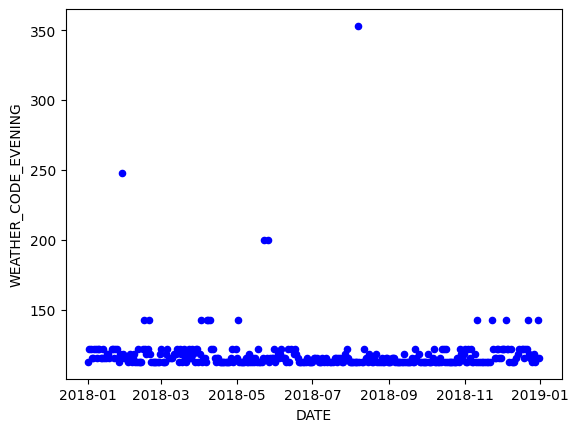

In [10]:
# Draw a scatterplot with Date on X-axis and WEATHER_CODE_EVENING on Y-axis
 #Code to complete
from datetime import datetime
from datetime import timedelta
df2018['DATE']=df2018['DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df2018.plot.scatter('DATE', 'WEATHER_CODE_EVENING', color = 'blue' )

#### Boxplot directly with Pandas

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

In [11]:
# Find a way to draw directly with pandas a boxplot on the column WEATHER_CODE_EVENING

<Axes: >

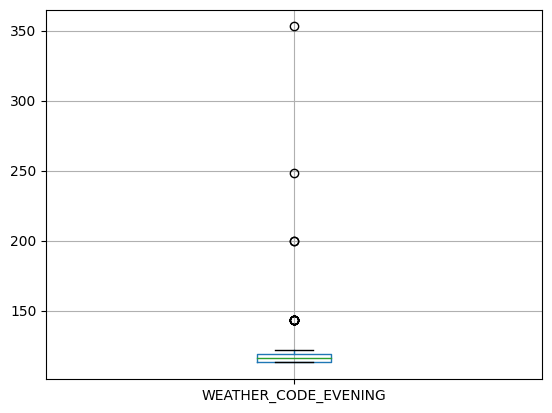

In [12]:
df2018.boxplot(column ='WEATHER_CODE_EVENING')

#### Deciles

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

In [13]:
# Find a way to print the 9 deciles + min + max of the column WEATHER_CODE_EVENING with the quantile method of pandas and a loop
for loop in range(1, 11):
  quantile = df2018['WEATHER_CODE_EVENING'].quantile(loop/10)
  print(quantile)

113.0
113.0
113.0
113.0
116.0
116.0
119.0
122.0
122.0
353.0


In [14]:
#for loop in range(0, 11):
  #if loop == 0 :
      #print(f"Le minimum est : {df2018['WEATHER_CODE_EVENING'].quantile(loop/10 )}")
  #elif loop == 10:
    #print(f"Le max est : {df2018['WEATHER_CODE_EVENING'].quantile(loop/10 )}")
  #else:
    #print(f"Le quantile {loop/10} est : {df2018['WEATHER_CODE_EVENING'].quantile(loop/10 )}")


#### Fill values
OK it seems that the most of datas are between 113 and 122. Maybe, we could fill the missing values with Mean or Median, it's up to you to choose. So you need :
- Calculate the mean or the median
- Fill the missing values only for **WEATHER_CODE_EVENING** with the `fillna()` method

When you're OK, remember tu use the `inplace=True` argument, otherwise, your modification will not be stored.

In [15]:
# Hop ! Your code here :
mean = df2018['WEATHER_CODE_EVENING'].mean()

#You have to complete this
df2018['WEATHER_CODE_EVENING'].fillna(mean,
                                      inplace = True) # When you are OK, you can replace this argument by True
df2018['WEATHER_CODE_EVENING'].value_counts()

113.000000    154
116.000000     78
122.000000     59
119.000000     34
118.507331     24
143.000000     12
200.000000      2
248.000000      1
353.000000      1
Name: WEATHER_CODE_EVENING, dtype: int64

In [16]:
# You can use this code to check how many missing values you have :
column_name = 'WEATHER_CODE_EVENING'
print("I have " ,df2018[column_name].isna().sum(), "missing values in the column", column_name)

I have  0 missing values in the column WEATHER_CODE_EVENING


### 3.2 - Next columns : TOTAL_SNOW_MM and UV_INDEX

We trust you to choose right values to fill for both columns

In [17]:
df2018[50:75]

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
50,2018-02-20,12,6,27,8,12,8,0.8,91,9.000,...,76.500,12,9,6,119.000000,0.0,1.0,5.2,bad,False
51,2018-02-21,8,1,20,4,7,3,0.0,76,10.000,...,18.750,8,3,0,113.000000,0.0,1.0,10.4,very bad,False
52,2018-02-22,7,-2,19,-2,5,2,0.0,67,10.000,...,0.500,7,0,-3,113.000000,0.0,1.0,10.8,very bad,False
53,2018-02-23,6,-2,20,-2,5,1,0.0,58,10.000,...,0.125,6,0,-4,113.000000,0.0,1.0,10.8,very bad,False
54,2018-02-24,7,-3,18,-3,5,2,0.0,59,10.000,...,2.625,7,0,-4,113.000000,0.0,1.0,10.9,very bad,False
55,2018-02-25,6,-2,27,-2,5,1,0.0,54,10.000,...,9.750,6,0,-5,113.000000,0.0,1.0,10.9,very bad,False
56,2018-02-26,2,-4,31,-4,2,-2,0.0,32,10.000,...,2.000,2,0,-8,113.000000,0.0,1.0,11.0,very bad,False
57,2018-02-27,1,-6,26,-6,0,-3,0.0,44,10.000,...,6.500,1,0,-10,113.000000,0.0,1.0,11.0,very bad,False
58,2018-02-28,1,-6,35,-6,0,-1,0.3,32,8.750,...,56.750,1,0,-11,119.000000,0.0,1.0,7.0,very bad,False
59,2018-03-01,10,-2,27,0,5,8,3.1,94,7.875,...,97.250,10,8,-3,122.000000,0.0,1.0,5.5,very bad,False


In [18]:
# Your code here

df2018['TOTAL_SNOW_MM'].fillna(df2018['TOTAL_SNOW_MM'].mean(), inplace = True)
df2018['UV_INDEX'].fillna(df2018['UV_INDEX'].mean(), inplace = True)


#df2018['UV_INDEX'].fillna("1.5747800586510263")

print(df2018['TOTAL_SNOW_MM'].value_counts(), df2018['UV_INDEX'].value_counts())




0.0    365
Name: TOTAL_SNOW_MM, dtype: int64 1.00000    260
3.00000     30
4.00000     26
1.57478     24
2.00000     14
5.00000     11
Name: UV_INDEX, dtype: int64


### 3.3 - Next column :
SUNHOUR

<Axes: xlabel='DATE', ylabel='SUNHOUR'>

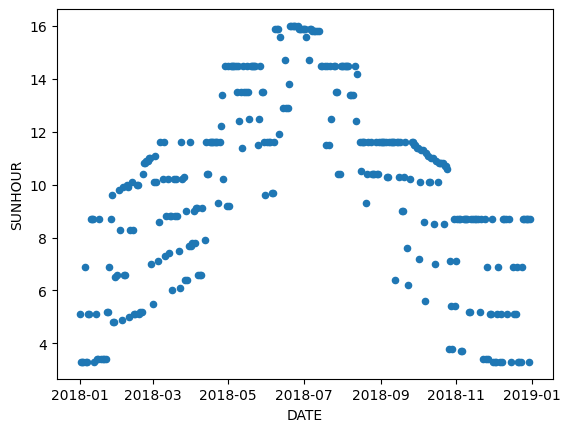

In [19]:
# Draw a scatterplot with Date on X-axis and SUNHOUR on Y-axis

df2018.plot.scatter(x='DATE', y='SUNHOUR')

#### Propagation
**It seems this is not a good idea to apply the same value all year long...**

You could use the the `method = 'ffill'` or `'bfill'` argument in `fillna()` to propagate non-null values forward or backward.

In [20]:
# Your code here
df2018['SUNHOUR'].fillna(method = 'ffill', inplace = True)
#df2018['SUNHOUR'].value_counts().sum()




### 3.4 - Column : OPINION
For Opinion, we have not yet idea. So, we can write a new value 'unknown' in this column.

In [21]:
df2018[50:75]

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
50,2018-02-20,12,6,27,8,12,8,0.8,91,9.000,...,76.500,12,9,6,119.000000,0.0,1.00000,5.2,bad,False
51,2018-02-21,8,1,20,4,7,3,0.0,76,10.000,...,18.750,8,3,0,113.000000,0.0,1.00000,10.4,very bad,False
52,2018-02-22,7,-2,19,-2,5,2,0.0,67,10.000,...,0.500,7,0,-3,113.000000,0.0,1.00000,10.8,very bad,False
53,2018-02-23,6,-2,20,-2,5,1,0.0,58,10.000,...,0.125,6,0,-4,113.000000,0.0,1.00000,10.8,very bad,False
54,2018-02-24,7,-3,18,-3,5,2,0.0,59,10.000,...,2.625,7,0,-4,113.000000,0.0,1.00000,10.9,very bad,False
55,2018-02-25,6,-2,27,-2,5,1,0.0,54,10.000,...,9.750,6,0,-5,113.000000,0.0,1.00000,10.9,very bad,False
56,2018-02-26,2,-4,31,-4,2,-2,0.0,32,10.000,...,2.000,2,0,-8,113.000000,0.0,1.00000,11.0,very bad,False
57,2018-02-27,1,-6,26,-6,0,-3,0.0,44,10.000,...,6.500,1,0,-10,113.000000,0.0,1.00000,11.0,very bad,False
58,2018-02-28,1,-6,35,-6,0,-1,0.3,32,8.750,...,56.750,1,0,-11,119.000000,0.0,1.00000,7.0,very bad,False
59,2018-03-01,10,-2,27,0,5,8,3.1,94,7.875,...,97.250,10,8,-3,122.000000,0.0,1.00000,5.5,very bad,False


In [22]:
# Your code here

df2018["OPINION"].fillna('unknown', inplace = True)


## Now, each axis should have 365 non-null values.

In [23]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

## 4 - Visualize your modifications
Draw 4 scatterplots with Date on X-axis, and each of the 4 numeric modified columns on Y-axis :
- The original datas will be in blue
- The new data (your datas) in red

It's the moment to use your "flag" column created at the beginning. It'll be easier in seaborn with `hue` argument.

You should get something like this:

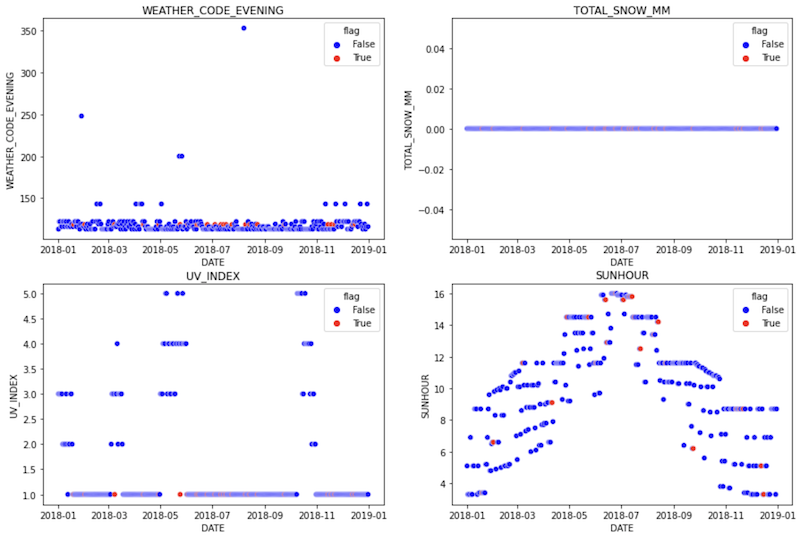

In [24]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

<Axes: xlabel='DATE', ylabel='SUNHOUR'>

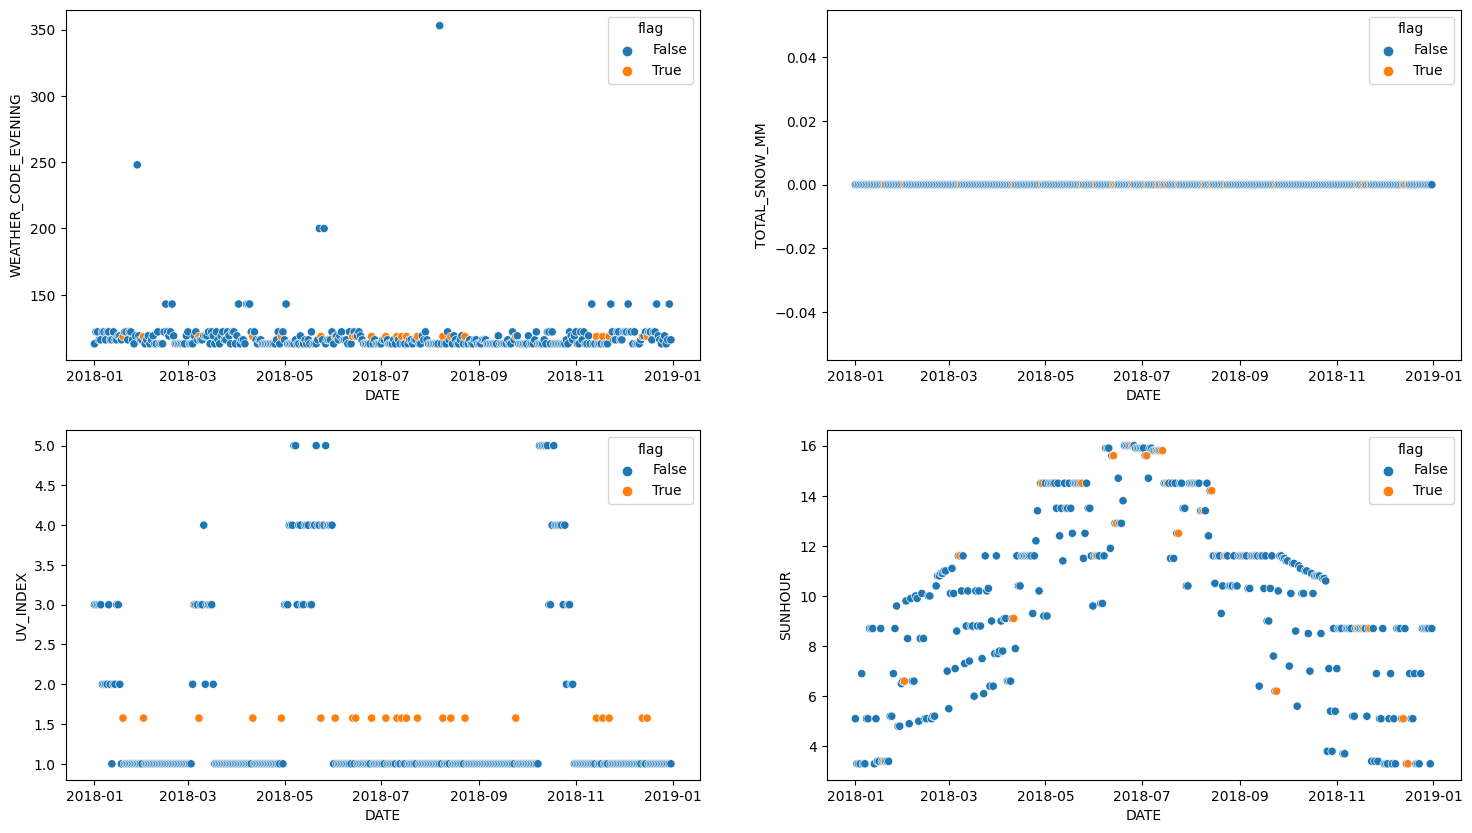

In [25]:
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns



#fig, (graph1, graph2, graph3, graph4) = plt.subplots(1, 4, figsize=(40, 10))

#plt.ylabel('Températures Max')
#graph1.scatter(x = df_weather["DATE"], y = df_weather["WEATHER_CODE_EVENING"])
#graph1.yaxis.set_ticks(range(-5, 41, 5)) # définis l'axe des ordonnées(y)
#graph1.set_title(
   # " Max Temperatures",
   # fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 10},
#)
#graph1.set_ylabel('Temperature MAX')





fig, axe = plt.subplots(2,2, figsize = (18,10))

sns.scatterplot(ax = axe[0,0], data = df2018, x=pd.to_datetime(df2018['DATE']), y= df2018["WEATHER_CODE_EVENING"], hue=df2018["flag"])
sns.scatterplot(ax = axe[0,1], data = df2018, x=pd.to_datetime(df2018['DATE']), y= df2018["TOTAL_SNOW_MM"], hue=df2018["flag"])
sns.scatterplot(ax = axe[1,0], data = df2018, x=pd.to_datetime(df2018['DATE']), y= df2018["UV_INDEX"], hue=df2018["flag"])
sns.scatterplot(ax = axe[1,1], data = df2018, x=pd.to_datetime(df2018['DATE']), y= df2018["SUNHOUR"], hue=df2018["flag"])
#sns.scatterplot(data = df2018, x="DATE", y="TOTAL_SNOW_MM", hue="flag")



